<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/UAS/Regression_Models_MLP_%E2%80%93_predict_continuous_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown 1oEXSD137hPm_Fx5xSPRvlAr3silj3suK

Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=fdcc40a3-5120-429a-bef5-efb5b4412476
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:04<00:00, 91.8MB/s]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('RegresiUTSTelkom.csv')
df

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515339,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515340,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515341,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515342,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [4]:
import numpy as np

target_col = df.select_dtypes(include='int64').columns[0]
print(f"Kolom target: {target_col}")

# Cek missing values
print("\nMissing values sebelum pembersihan:")
print(df.isnull().sum())

# Handle missing values (contoh: mengisi dengan mean)
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype != 'object': # Hanya mengisi kolom numerik
            df[col] = df[col].fillna(df[col].mean())
        else: # Untuk kolom objek, bisa dihapus atau diisi dengan modus jika perlu
            # Contoh: mengisi dengan modus
            # df[col] = df[col].fillna(df[col].mode()[0])
            # Contoh: menghapus baris dengan missing values di kolom objek
            df.dropna(subset=[col], inplace=True)


print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

# Cek duplikat
print(f"\nJumlah baris duplikat: {df.duplicated().sum()}")

# Hapus duplikat
df.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

# Cek tipe data
print("\nTipe data setelah pembersihan:")
print(df.info())

# Tampilkan statistik deskriptif
print("\nStatistik deskriptif setelah pembersihan:")
print(df.describe())

# Tampilkan beberapa baris pertama setelah pembersihan
print("\nDataframe setelah pembersihan (beberapa baris pertama):")
print(df.head())

Kolom target: 2001

Missing values sebelum pembersihan:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64

Missing values setelah pembersihan:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64

Jumlah baris duplikat: 214
Jumlah baris setelah menghapus duplikat: 515130

Tipe data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 515130 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515130 non-null  int64  
 1   49.94357    515130 non-null  float64
 2   21.47114    515130 non-null  float64
 3   73.0775     515130 non-null  float64
 4   8.74861     515130 non-null  float64
 5   -17.40628   51

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# Deteksi kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Konversi target ke numpy
y_train = y_train.values
y_test = y_test.values


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 2387919.7500 - mae: 1403.2174 - val_loss: 79.5575 - val_mae: 6.3425
Epoch 2/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 84.7749 - mae: 6.4417 - val_loss: 79.2051 - val_mae: 6.4892
Epoch 3/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 83.6236 - mae: 6.3797 - val_loss: 76.9469 - val_mae: 6.0349
Epoch 4/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 81.7746 - mae: 6.3029 - val_loss: 75.9671 - val_mae: 6.0726
Epoch 5/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 81.8010 - mae: 6.2954 - val_loss: 75.5688 - val_mae: 6.0633
Epoch 6/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 81.0893 - mae: 6.2600 - val_loss: 75.6969 - val_mae: 6.0523
Epoch 7/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 80.4013 - mae: 6.2372 - val_loss: 74.9199 - val_mae: 5.9263
Epoch 8/10
11269/11269 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 80.6661 - mae: 6.2418 - val_loss: 74.9327 - val_mae:

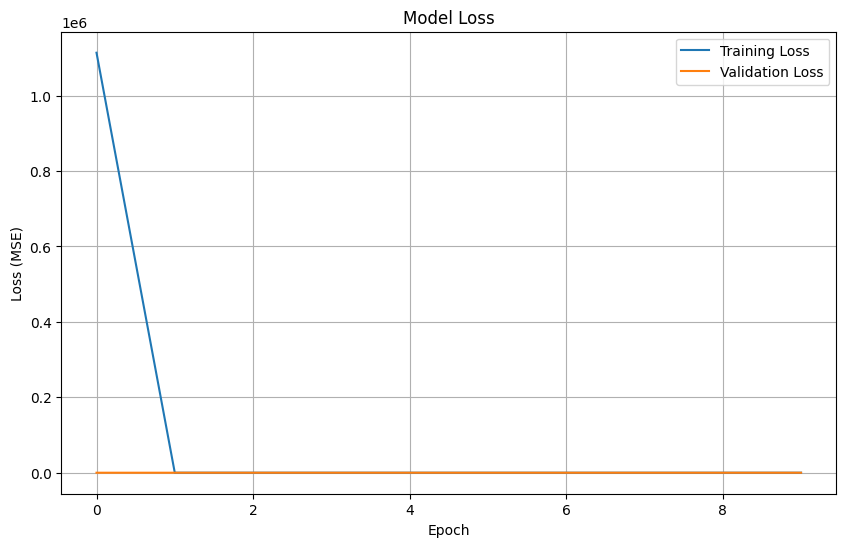

In [6]:
# prompt: lakukanlah mengembangkan arsitektur MLP menggunakan TensorFlow dan PyTorch dengan menerapkan kombinasi teknik deep learning seperti dropout, batch normalization, penyesuaian learning rate (misalnya learning-rate scheduling atau warm restarts), modern optimizer, weight decay L1/L2, dan early stopping untuk meningkatkan kemampuan generalisasi, tidak usah gunakan semua kombinasi, pilih yang cocok saja

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identifikasi fitur dan target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Bagi data menjadi training, validation, dan test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 0.5 * 0.3 = 0.15 dari total data

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Definisikan model MLP menggunakan TensorFlow
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3), # Dropout
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)), # L2 Regularization
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1) # Output layer for regression
])

# Kompilasi model
optimizer = Adam(learning_rate=0.001) # Modern optimizer (Adam)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae']) # Mean Squared Error for regression

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training model
history = model.fit(X_train_scaled, y_train,
                    epochs=10, # Jumlah epoch bisa disesuaikan
                    batch_size=32, # Batch size bisa disesuaikan
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[early_stopping])

# Evaluasi model pada test set
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nMean Squared Error on Test Data: {loss:.4f}')
print(f'Mean Absolute Error on Test Data: {mae:.4f}')

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

2415/2415 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step

--- Evaluation Metrics ---
Mean Squared Error (MSE): 74.8133
Root Mean Squared Error (RMSE): 8.6495
R-squared (R²): 0.3709


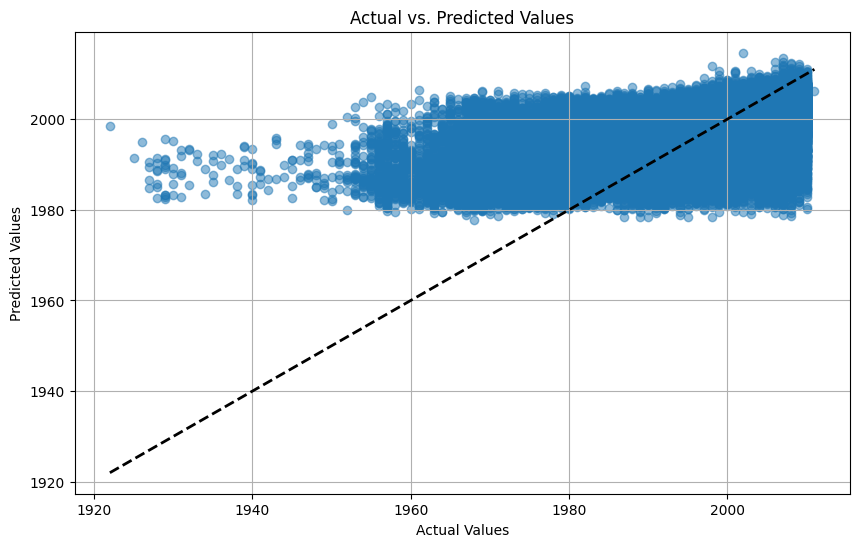

In [7]:
# prompt: Gunakan Matriks Evaluasi (RMSE,MSE,RSquared) serta visualisasikan predicted dan actual value! Jelaskan matriks mana terbaik!

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Evaluation Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

Epoch 1 | Train Loss: 1034627.3726 | Val Loss: 505.3692
Epoch 2 | Train Loss: 1377.2220 | Val Loss: 313.7201
Epoch 3 | Train Loss: 645.3853 | Val Loss: 354.5651
Epoch 4 | Train Loss: 408.1425 | Val Loss: 205.4830
Epoch 5 | Train Loss: 270.6558 | Val Loss: 141.3382
Epoch 6 | Train Loss: 182.3188 | Val Loss: 114.1911
Epoch 7 | Train Loss: 128.7475 | Val Loss: 89.7067
Epoch 8 | Train Loss: 108.7337 | Val Loss: 87.4560
Epoch 9 | Train Loss: 99.4491 | Val Loss: 79.3777
Epoch 10 | Train Loss: 93.6260 | Val Loss: 79.4485

Test MSE: 80.4057
Test MAE: 6.2850


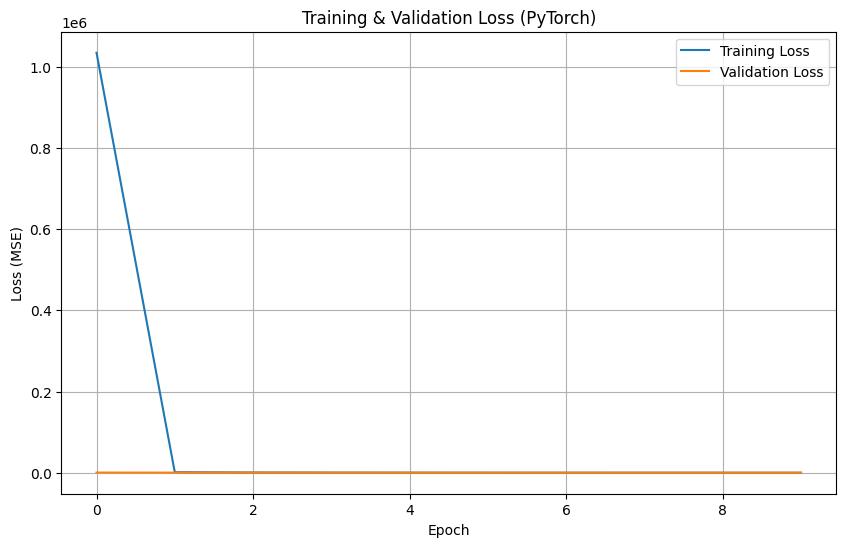

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data preparation
X = df.drop(target_col, axis=1).values
y = df[target_col].values.reshape(-1, 1)

# Split: train, val, test (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Dataset & Dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# MLP Model Definition
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.drop1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.drop2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)

        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.drop1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.drop2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        return self.out(x)

# Instantiate model
model = MLP(X_train_tensor.shape[1])

# Optimizer with L2 regularization (weight decay)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)

# Loss function and scheduler
criterion = nn.MSELoss()
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Early stopping params
early_stopping_patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0
num_epochs = 10

train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            loss = criterion(preds, yb)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    scheduler.step(avg_val_loss)

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_model.pth")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Load best model
model.load_state_dict(torch.load("best_model.pth"))

# Evaluate on test data
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
    test_loss = criterion(preds, y_test_tensor).item()
    test_mae = torch.mean(torch.abs(preds - y_test_tensor)).item()
    print(f"\nTest MSE: {test_loss:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss (PyTorch)")
plt.legend()
plt.grid(True)
plt.show()



Evaluation Metrics:
MSE     : 80.4057
RMSE    : 8.9669
R² Score: 0.3239


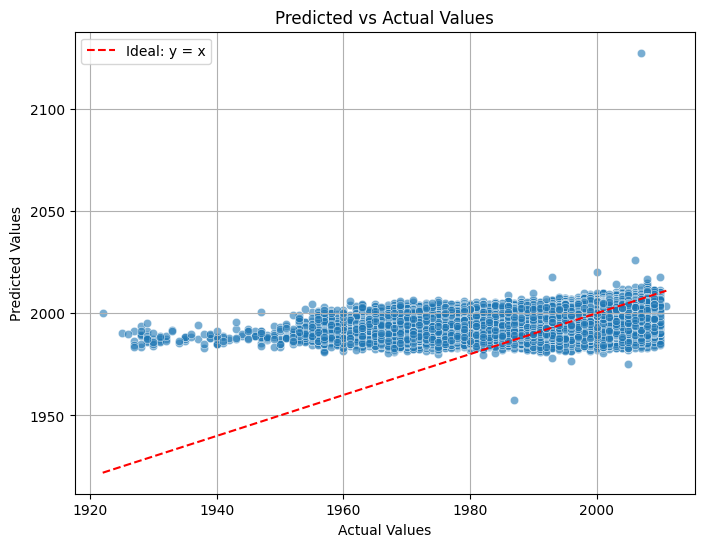

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi hasil prediksi dan ground truth ke NumPy
y_true = y_test_tensor.numpy().flatten()
y_pred = preds.numpy().flatten()

# Hitung MSE, RMSE, R²
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Tampilkan metrik
print(f"\nEvaluation Metrics:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label="Ideal: y = x")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()


### 1. Model TensorFlow

#### Kelebihan
- Ekosistem lengkap dan praktis (TensorBoard, Keras callbacks).
- Sintaks ringkas → cocok untuk eksperimen cepat dan deployment.
- Cocok untuk beginner hingga intermediate.

#### Kekurangan
- Lebih sulit untuk kontrol low-level behavior (custom loop, loss).
- Sedikit terasa sebagai “black-box” karena otomatisasi tinggi.

---

### 2. Model PyTorch


#### Kelebihan
- Lebih fleksibel & transparan (kontrol penuh atas training loop).
- Cocok untuk eksperimen lanjutan & penelitian.
- Mudah dikustomisasi untuk kebutuhan advance.

#### Kekurangan
- Lebih verbose (perlu buat training loop, validasi, dsb secara manual).
- Butuh setup visualisasi dan logging tambahan secara eksplisit.

---

## Perbandingan Ringkas

| Aspek                  | TensorFlow         | PyTorch               |
|------------------------|--------------------|------------------------|
| Sintaks & Boilerplate  | Ringkas & otomatis | Verbose & manual      |
| Fleksibilitas          | Cukup              | Sangat fleksibel       |
| Cocok untuk            | Produksi cepat     | Penelitian & eksperimen|
| Ekosistem              | Kuat (Keras, TF)   | Sangat aktif (Torch)  |

---

Jika ingin digunakan untuk:
- **Deployment cepat dan praktis** → TensorFlow lebih cocok.
- **Eksperimen lanjutan atau riset** → PyTorch lebih unggul.




## Perbandingan Model TensorFlow vs PyTorch

### Hasil Evaluasi

| Metrik        | TensorFlow    | PyTorch       |
|---------------|----------------|----------------|
| **MSE**       | 74.8133        | 80.4057        |
| **RMSE**      | 8.6495         | 8.9669         |
| **R² Score**  | 0.3709         | 0.3239         |

---

### Kesimpulan:

Model **TensorFlow** menunjukkan performa lebih baik dibanding PyTorch karena memiliki:
- Nilai **MSE dan RMSE lebih rendah**, yang berarti kesalahan prediksi lebih kecil.
- Nilai **R² Score lebih tinggi**, menandakan model menjelaskan lebih banyak variansi dari target.

> Selisih MSE ≈ 5.59 poin  
> Selisih R² ≈ 0.047 poin  
> Meskipun perbedaannya tidak terlalu besar, **TensorFlow unggul secara konsisten** di ketiga metrik.


### Kesimpulan Akhir

**Model terbaik saat ini: TensorFlow**  
**Namun, masih ada ruang besar untuk peningkatan performa.**

---

Jika diperlukan, langkah selanjutnya bisa meliputi:
- Visualisasi residual (kesalahan prediksi)
- Bandingkan dengan model machine learning lain seperti XGBoost, Random Forest, dsb
- Implementasi cross-validation untuk validasi yang lebih kuat
